In [2]:
from aaai_22 import AAAI_22_Dataset
import pandas as pd
import warnings
import numpy as np
import tensorflow as tf
import os
import sys
child_dir = os.path.abspath('dfl')
sys.path.append(child_dir)
from dfl.whittle import newWhittleIndex
from dfl.trajectory import getSimulatedTrajectories
from dfl.policy import getProbs
from dfl.ope import eval_policy
import matplotlib.pyplot as plt
import datetime
import random
from sklearn.cluster import KMeans
from dataset_utils import extract_mdps, extract_budget, split_offline_traj

from data_loader import StudyDataLoader
warnings.filterwarnings("ignore")

In [3]:
dl_april = StudyDataLoader('April21', '2021-07-07')
features_april = dl_april.feat_df[dl_april.experiment_df["exp_group"] == 'rmab']

2023-08-03 16:40:18,973 - INFO - load_data - Loading data from folder 'data/feb16-mar15_data'
2023-08-03 16:40:18,994 - INFO - load_call_data - Found 1 files in 'data/feb16-mar15_data/call'.
2023-08-03 16:40:18,995 - INFO - load_call_data - Loading and cleaning call data.
100%|███████████████████████████████████████████████████████████████████████████| 1/1 [00:13<00:00, 13.72s/it]


Pandas Apply:   0%|          | 0/244 [00:00<?, ?it/s]

2023-08-03 16:40:38,353 - WARNING - gest_age_to_list - 1 is not a valid gestation age.
2023-08-03 16:40:38,354 - WARNING - gest_age_to_list - 2 is not a valid gestation age.
2023-08-03 16:40:38,354 - WARNING - gest_age_to_list - 3 is not a valid gestation age.
2023-08-03 16:40:38,354 - WARNING - gest_age_to_list - 4 is not a valid gestation age.
2023-08-03 16:40:38,354 - WARNING - gest_age_to_list - 5 is not a valid gestation age.
2023-08-03 16:40:38,354 - WARNING - gest_age_to_list - 6 is not a valid gestation age.
2023-08-03 16:40:38,355 - WARNING - gest_age_to_list - 7 is not a valid gestation age.
2023-08-03 16:40:38,355 - WARNING - gest_age_to_list - 38 is not a valid gestation age.
2023-08-03 16:40:38,355 - WARNING - gest_age_to_list - 39 is not a valid gestation age.
2023-08-03 16:40:38,355 - WARNING - gest_age_to_list - 2 is not a valid gestation age.
2023-08-03 16:40:38,356 - WARNING - gest_age_to_list - 3 is not a valid gestation age.
2023-08-03 16:40:38,356 - WARNING - gest_

2023-08-03 16:40:38,479 - WARNING - gest_age_to_list - 44 is not a valid gestation age.
2023-08-03 16:40:38,480 - WARNING - gest_age_to_list - 43 is not a valid gestation age.
2023-08-03 16:40:38,480 - WARNING - gest_age_to_list - 40 is not a valid gestation age.
2023-08-03 16:40:38,480 - WARNING - gest_age_to_list - 48 is not a valid gestation age.
2023-08-03 16:40:38,480 - WARNING - gest_age_to_list - 46 is not a valid gestation age.
2023-08-03 16:40:38,480 - WARNING - gest_age_to_list - 41 is not a valid gestation age.
2023-08-03 16:40:38,481 - WARNING - gest_age_to_list - 45 is not a valid gestation age.
2023-08-03 16:40:38,481 - WARNING - gest_age_to_list - 49 is not a valid gestation age.
2023-08-03 16:40:38,481 - WARNING - gest_age_to_list - 50 is not a valid gestation age.
2023-08-03 16:40:38,482 - WARNING - gest_age_to_list - 51 is not a valid gestation age.
2023-08-03 16:40:38,482 - WARNING - gest_age_to_list - 52 is not a valid gestation age.


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

2023-08-03 16:40:39,575 - INFO - load_call_data - Call data contains 1250030 relevant call records for 23517 beneficiaries.
2023-08-03 16:40:39,588 - INFO - load_data - Successfully loaded and cleaned beneficiary and call data.
2023-08-03 16:40:39,588 - INFO - load_data - Beneficiary data contains data for 23517 beneficiaries
2023-08-03 16:40:39,594 - INFO - load_data - Call data contains 1250030 call records for 23517 beneficiaries
2023-08-03 16:40:40,986 - INFO - preprocess_and_make_dataset - Preprocessing beneficiary data.
2023-08-03 16:40:41,175 - INFO - preprocess_and_make_dataset - Preprocessing beneficiary data completed.
2023-08-03 16:40:41,176 - INFO - preprocess_and_make_dataset - Preprocessing call data.
2023-08-03 16:40:42,339 - INFO - preprocess_and_make_dataset - Preprocessing call data completed.
2023-08-03 16:40:42,339 - INFO - preprocess_and_make_dataset - Building the dataset.
2023-08-03 16:40:42,358 - INFO - preprocess_and_make_dataset - Preproccessed data has 23003 

Get call week
get max duration calls
Only retain max duration calls
Obtain State Vector
Max array shape is  21
Get call week


In [4]:
import importlib
import training_new.beneficiary_data
import training_new.call_data
importlib.reload(training_new.beneficiary_data)
importlib.reload(training_new.call_data)
dataset = AAAI_22_Dataset()
# dl = StudyDataLoader('July22', '2022-9-07')
# features_july = dl.feat_df[dl.experiment_df["exp_group"] == 'rmab']


[2874, 2489, 2034, 1293, 1051, 665, 300, 85, 4, 0, 0, 0, 0, 0, 0, 0, 12, 35, 50, 63, 67, 79, 86] [2878, 2485, 2013, 1227, 1014, 615, 273, 99, 2, 0, 0, 0, 0, 0, 2, 4, 13, 24, 34, 46, 49, 66, 66]


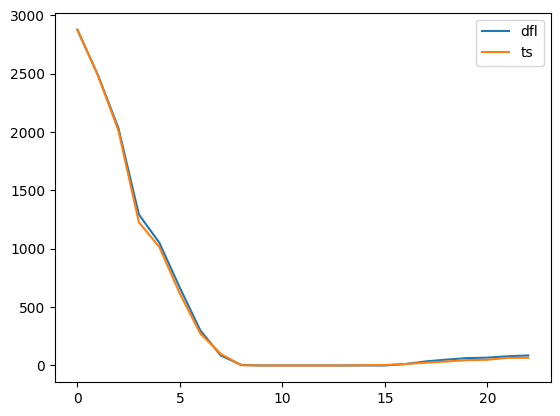

In [140]:
# nan numbers are good starting at week 8
# dfl: [2874, 2489, 2034, 1293, 1051, 665, 300, 85, 4, 0, 0, 0, 0, 0, 0, 0, 12, 35, 50, 63, 67, 79, 86]
# ts: [2878, 2485, 2013, 1227, 1014, 615, 273, 99, 2, 0, 0, 0, 0, 0, 2, 4, 13, 24, 34, 46, 49, 66, 66]
states_1 = dl.state_df[dl.experiment_df.exp_group == 'dfl']
states_2 = dl.state_df[dl.experiment_df.exp_group == 'ts']

a=[]
b=[]
for i in range(23):
    a.append(states_1['week{s}_state'.format(s=i)].isna().sum())
    b.append(states_2['week{s}_state'.format(s=i)].isna().sum())
print(a,b)
plt.plot(np.arange(23),a, label='dfl')
plt.plot(np.arange(23),b, label='ts')
plt.legend()
plt.show()

In [108]:
temp_states_july22_ts = dl.state_df[dl.experiment_df.exp_group == 'ts'].iloc[:, 7:].fillna(0)
temp_actions_july22_ts = dl.action_df[dl.experiment_df.exp_group == 'ts'].iloc[:, 7:].fillna(0)

temp_states_july22_dfl = dl.state_df[dl.experiment_df.exp_group == 'dfl'].iloc[:, 7:].fillna(0)
temp_actions_july22_dfl = dl.action_df[dl.experiment_df.exp_group == 'dfl'].iloc[:, 7:].fillna(0)

full_ts = temp_states_july22_ts.merge(temp_actions_july22_ts, on='user_id', how='left').fillna(0)
full_dfl = temp_states_july22_dfl.merge(temp_actions_july22_dfl, on='user_id', how='left').fillna(0)

states_july22_ts = full_ts.iloc[:, :16].values.T
actions_july22_ts = full_ts.iloc[:, 17:].values.T

states_july22_dfl = full_dfl.iloc[:, :16].values.T
actions_july22_dfl = full_dfl.iloc[:, 17:].values.T
actions_july22_dfl.shape


(16, 3000)

In [101]:
feature_ts = dl.feat_df[dl.experiment_df.exp_group == 'ts']

feature_dfl = dl.feat_df[dl.experiment_df.exp_group == 'dfl']


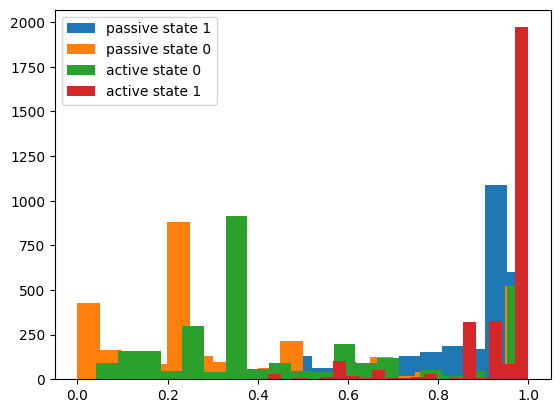

In [157]:
# create proper trajectories with new data

new_H = states_july22_ts.shape[0]
new_N = states_july22_ts.shape[1]
july22_trajectories_for_mdp = np.zeros((1,new_N,new_H,4))
july22_trajectories_for_mdp[0,:,:,0] = states_july22_ts.T
july22_trajectories_for_mdp[0,:,:new_H-1,2] = states_july22_ts.T[:,1:]
july22_trajectories_for_mdp[0,:,:,1] = actions_july22_dfl.T
new_transition_probabilities,new_clusters = dataset_utils.extract_mdps(july22_trajectories_for_mdp.astype(int), 1,'clusters')
new_transition_probabilities = new_transition_probabilities[0]
plt.hist(new_transition_probabilities[:,1,0,1], bins=20,label="passive state 1")
plt.hist(new_transition_probabilities[:,0,0,1], bins=20, label="passive state 0")
plt.hist(new_transition_probabilities[:,0,1,1], bins=20, label="active state 0")
plt.hist(new_transition_probabilities[:,1,1,1], bins=20, label="active state 1")
plt.legend()
plt.show()

In [245]:
def get_risk_score(benef,feat):
    benef_feature = feat.iloc[benef]
    return max(benef_feature['education_1'],benef_feature['education_2']) + benef_feature['education_7'] + max(benef_feature['income_bracket_0'], benef_feature['income_bracket_1']) + max(benef_feature['phone_owner_1'],benef_feature['phone_owner_2'])

In [246]:
def get_simpleish_transitions(n_history,n_benefs):
    transitions_full = np.zeros((n_benefs, 2 ** n_history, 2, 2 ** n_history))
    transitions = np.zeros((2,2))
    for i in range(n_benefs):
        transitions[0, 0] = np.random.uniform(0, 0.5)
        transitions[0, 1] = np.random.uniform(.5, .999)
        transitions[1, 0] = np.random.uniform(0, .7)
        transitions[1, 1] = np.random.uniform(.701, .999)
        for j in range(2 ** history):
            bin_val = bin(j)[2:]
            curr_state = (n_history-len(bin_val))*'0' + bin_val
            next_state_0 = int(curr_state[1:] + '0', 2)
            next_state_1 = int(curr_state[1:] + '1', 2)

            # action = 0
            transitions_full[i, j, 0, next_state_0] = 1 - transitions[int(curr_state[-1]),0]
            transitions_full[i, j, 0, next_state_1] = transitions[int(curr_state[-1]),0]
            # action = 1
            transitions_full[i, j, 1, next_state_0] = 1 - transitions[int(curr_state[-1]),1]
            transitions_full[i, j, 1, next_state_1] = transitions[int(curr_state[-1]),1]
    return transitions_full

In [247]:
# Initialize parameters
import importlib
import dataset_utils
importlib.reload(dataset_utils)

L=11
history=1
n_states = 2 ** history
num_trials=1
n_policies=1

traj = dataset._get_offline_traj('rmab',L)
transition_probabilities,clusters = dataset_utils.extract_mdps(np.array(traj[1],dtype='int64')[None], 1,'clusters')
transition_probabilities = transition_probabilities[0]
benefs_includes = transition_probabilities[:,1,0,1]<0.78
print(np.sum(benefs_includes))
transition_probabilities = transition_probabilities[transition_probabilities[:,1,0,1]<0.78]


n = transition_probabilities.shape[0]
n_benefs=n
print(n)
reward_numpy = np.zeros((n, n_states))
reward_numpy[:,1] = 1
reward_opt = tf.constant(reward_numpy,dtype=tf.float32)

2154
2154


In [248]:
# optimal whittle indices if needed

w_opt = newWhittleIndex(tf.constant(transition_probabilities, dtype=tf.float32),reward_opt).numpy()
w_opt = np.reshape(w_opt,(n,transition_probabilities.shape[1]))

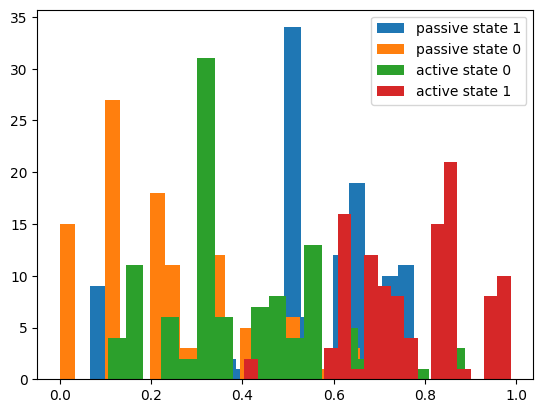

In [253]:
# Visualize Transition Probabilities

# Make sure everything adds to 1

# plt.hist(transition_probabilities[:,1,0,0]+transition_probabilities[:,1,0,1], bins=70, edgecolor='black')
# plt.hist(transition_probabilities[:,1,1,1]+transition_probabilities[:,1,1,0], bins=70, edgecolor='black')
# plt.hist(transition_probabilities[:,0,0,1]+transition_probabilities[:,0,0,0], bins=70, edgecolor='black')
# plt.hist(transition_probabilities[:,0,1,1]+transition_probabilities[:,0,1,0], bins=70, edgecolor='black')

# plt.hist((transition_probabilities[:,1,0,1] - transition_probabilities[:,0,0,1])[transition_probabilities[:,1,0,1]<0.78], bins=20, label="state action 0")
# plt.hist((transition_probabilities[:,1,1,1]- transition_probabilities[:,0,1,1])[transition_probabilities[:,1,0,1]<0.78], bins=20, label="state action 1")
# plt.hist((transition_probabilities[:,0,1,1]-transition_probabilities[:,0,0,1])[transition_probabilities[:,1,0,1]<0.78], bins=20, label="action 0 state")
# plt.hist((transition_probabilities[:,1,1,1]-transition_probabilities[:,1,0,1])[transition_probabilities[:,1,0,1]<0.78], bins=20,label="action 1 state")

# plt.legend()
# plt.show()

# plt.hist(population_transition_probabilities[:,1,0,1], bins=20, edgecolor='black',label="passive state 1")
# plt.hist(population_transition_probabilities[:,0,0,1], bins=20, edgecolor='black', label="passive state 0")
# plt.hist(population_transition_probabilities[:,0,1,1], bins=20, edgecolor='black',label="active state 0")

# plt.hist(transition_probabilities[:,1,1,1], bins=20, edgecolor='black',label="active state 1")
# plt.legend()
# plt.show()

plt.hist(transition_probabilities[:,1,0,1][np.logical_and(risk_scores==3,transition_probabilities[:,1,0,1]<0.78)], bins=20,label="passive state 1")
plt.hist(transition_probabilities[:,0,0,1][np.logical_and(risk_scores==3,transition_probabilities[:,1,0,1]<0.78)], bins=20,label="passive state 0")
plt.hist(transition_probabilities[:,0,1,1][np.logical_and(risk_scores==3,transition_probabilities[:,1,0,1]<0.78)], bins=20,label="active state 0")
plt.hist(transition_probabilities[:,1,1,1][np.logical_and(risk_scores==3,transition_probabilities[:,1,0,1]<0.78)], bins=20,label="active state 1")
# plt.hist(transition_probabilities[:,0,1,1][risk_scores==0], bins=20, edgecolor='black',label="active state 0")

# plt.hist(transition_probabilities[:,1,1,1][risk_scores==0], bins=20, edgecolor='black',label="active state 1")

# plt.hist(transition_probabilities[:,1,0,1] - transition_probabilities[:,0,0,1], bins=20, edgecolor='black', label="states action 0")
# plt.hist(transition_probabilities[:,0,1,1] - transition_probabilities[:,0,0,1], bins=20, edgecolor='black',label="action state 0")
# plt.hist(transition_probabilities[:,1,1,1] - transition_probabilities[:,0,1,1], bins=20, edgecolor='black',label="states action 1")
# plt.hist(transition_probabilities[:,1,1,1] - transition_probabilities[:,1,0,1], bins=20, edgecolor='black',label="action state 1")
plt.legend()
# plt.show()

In [254]:
np.sum(transition_probabilities[:,1,0,1]>0.75)

143

In [255]:
# Fix the state/action trajectories
joint_traj = traj[1]
state_traj = np.zeros((num_trials,n_policies,L,n))
action_traj = np.zeros((num_trials,n_policies,L,n))
actions_summary = {}
actions_count = {}
listening_count = {}
K = 0
i = 0
for arm, value in enumerate(benefs_includes): # for each beneficary
    if value:
        for j in range(L): # for each timestep
            # joint traj is of form (s,a,s',r)
            state_traj[0,0,j,i] = joint_traj[arm][j][0]
            action_traj[0,0,j,i] = joint_traj[arm][j][1]
            if action_traj[0,0,j,i] == 1:
                K += 1
        i+=1
K = int(K/L)
print(K)

75


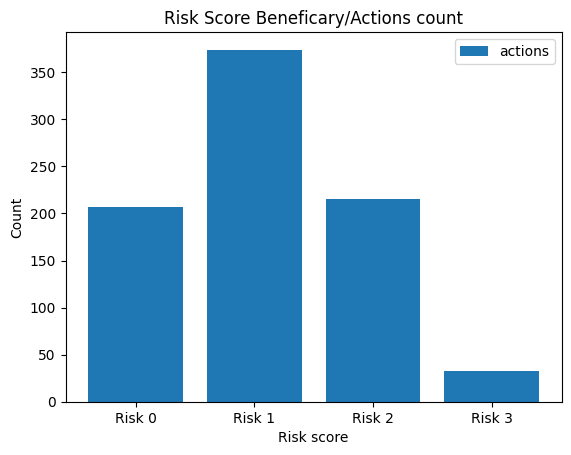

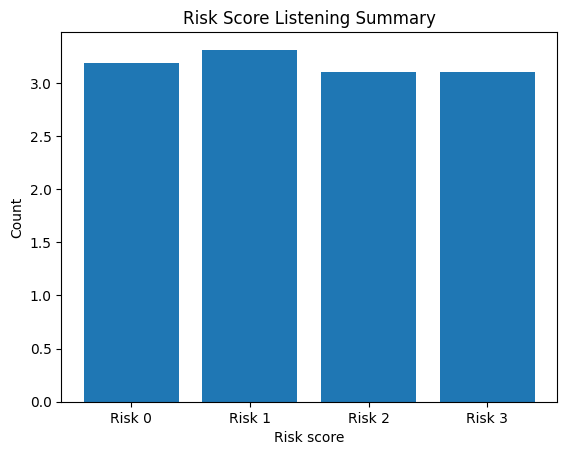

In [256]:
# Visualize Risk scores for actions and listenership
risk_scores = np.zeros(n,dtype=int)

for i in range(n):
    risk_scores[i] = int(get_risk_score(i,features_april))
unique_values, value_counts = np.unique(risk_scores, return_counts=True)
n_risk_groups = len(unique_values)

def plot_risk(states,actions):
#     plt.bar(['Risk 0', 'Risk 1', 'Risk 2', 'Risk 3'], L*value_counts,label='beneficiary count')    
    actions_by_risk = np.zeros(n_risk_groups)
    listening_by_risk = np.zeros(n_risk_groups)
    for i in range(n): # for each beneficary
        for j in range(L): # for each timestep
            actions_by_risk[risk_scores[i]] += actions[0,0,j,i]
            listening_by_risk[risk_scores[i]] += states[0,0,j,i]/float(value_counts[risk_scores[i]])
    plt.xlabel('Risk score')
    plt.ylabel('Count')
    plt.title('Risk Score Beneficary/Actions count')

    plt.bar(['Risk 0', 'Risk 1', 'Risk 2', 'Risk 3'], actions_by_risk, label='actions')
    # Show the plot
    plt.legend()
    plt.show()
    plt.bar(['Risk 0', 'Risk 1', 'Risk 2', 'Risk 3'], listening_by_risk)

    # Set labels and title
    plt.xlabel('Risk score')
    plt.ylabel('Count')
    plt.title('Risk Score Listening Summary')
    plt.show()
plot_risk(state_traj,action_traj)

2154
590 21
592 33
594 37
593 34
598 33
576 59
584 66
570 70
574 82
559 75
577 71


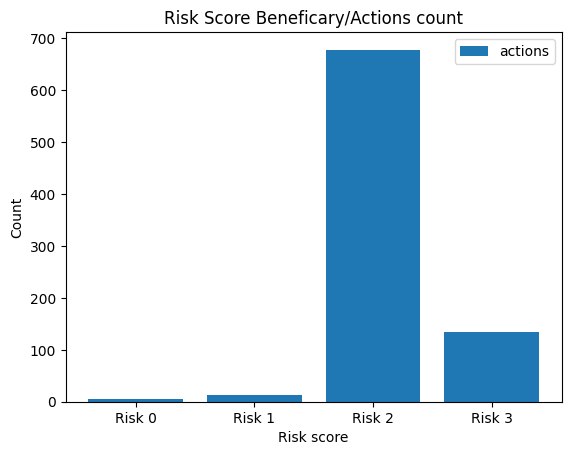

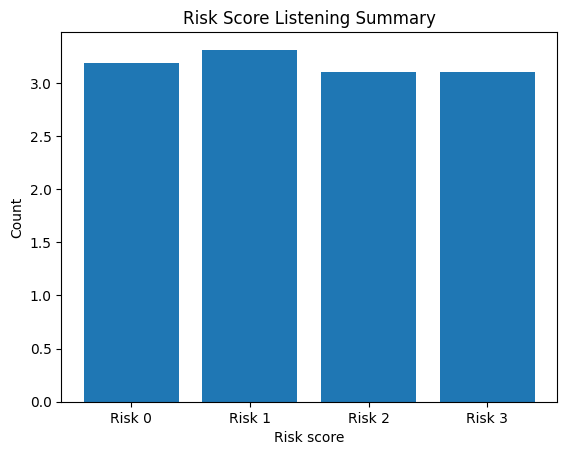

In [257]:
# Editing trajectories based on risk score

# how confidently we want to switch the calls
confidence = 0.999
edited_action_traj_risk = np.copy(action_traj)
edited_state_traj_risk = np.copy(state_traj)
np.random.seed(0)

def get_switched_listeners(states,actions,h):
    uncalled_high_risk = set()
    called_low_risk = set()
    for i in range(n): # for each beneficary
        if edited_action_traj_risk[0,0,h,i] == 1 and risk_scores[i] in {0,1}:
            called_low_risk.add(i)
        if edited_action_traj_risk[0,0,h,i] == 0 and risk_scores[i] in {3,2}:
            uncalled_high_risk.add(i)
    print(len(uncalled_high_risk), len(called_low_risk))
    return(uncalled_high_risk,called_low_risk)

print(n)
dist = np.zeros(n)
for h in range(L):
    uncalled_high_risk,called_low_risk = get_switched_listeners(edited_state_traj_risk,edited_action_traj_risk,h)
    total = len(uncalled_high_risk)
    interventions_available = len(called_low_risk)
    probability_switching = min(float(interventions_available)/total,1)
    for arm in range(n):
        if edited_action_traj_risk[0,0,h,arm] == 0 and arm in uncalled_high_risk and called_low_risk != set():
            if np.random.uniform()<probability_switching:
                dist[arm] +=1
                edited_action_traj_risk[0,0,h,arm] = 1
                temp_index = called_low_risk.pop()
                edited_action_traj_risk[0,0,h,temp_index] = 0
# plt.bar(np.arange(n), dist)
# plt.show()
plot_risk(edited_state_traj_risk,edited_action_traj_risk)

In [258]:
def get_risk_count(states,actions):
#     plt.bar(['Risk 0', 'Risk 1', 'Risk 2', 'Risk 3'], L*value_counts,label='beneficiary count')    
    actions_by_risk = np.zeros(n_risk_groups)
    listening_by_risk = np.zeros(n_risk_groups)
    for i in range(n): # for each beneficary
        for j in range(L): # for each timestep
            actions_by_risk[risk_scores[i]] += actions[0,0,j,i]
            listening_by_risk[risk_scores[i]] += states[0,0,j,i]/float(value_counts[risk_scores[i]])
    return actions_by_risk

2154
2154


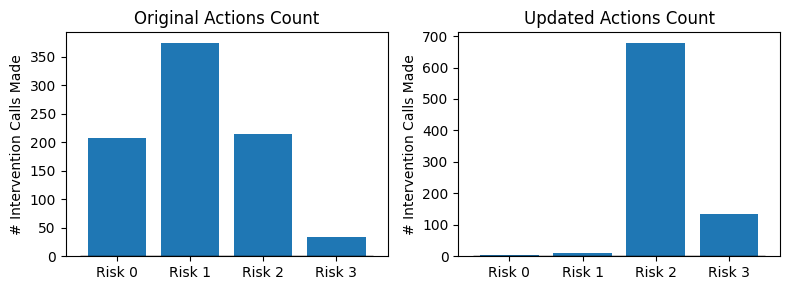

In [416]:
print(n)
print(len(risk_scores))
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
axs[0].set_title('Original Actions Count')
axs[0].set_ylabel('# Intervention Calls Made')
axs[0].bar(['Risk 0', 'Risk 1', 'Risk 2','Risk 3'], get_risk_count(state_traj,action_traj))
# for risk, val in zip(x, edited_actions_summary_risk_abs):
#     if val <0:
#         va='top'
#     else:
#         va='bottom'
#     axs[0].text(risk, int(val), str(int(val)), ha='center', va=va)
axs[1].bar(['Risk 0', 'Risk 1', 'Risk 2','Risk 3'], get_risk_count(edited_state_traj_risk,edited_action_traj_risk))
axs[1].set_title('Updated Actions Count')
axs[1].set_ylabel('# Intervention Calls Made')
# for risk, val in zip(x, edited_listening_summary_risk_abs):
#     if val <0:
#         va='top'
#     else:
#         va='bottom'
#     axs[1].text(risk, int(val), str(int(val)), ha='center', va=va)
axs[1].hlines(0, -0.5, len(x) - 0.5, colors='black', linewidth=1)
axs[0].hlines(0, -0.5, len(x) - 0.5, colors='black', linewidth=1)

plt.tight_layout()
plt.show()

In [260]:
# RUN IRL WITH NEW TRAJECTORIES
epochs = 30
gamma=0.99
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.01)
rewards = np.zeros((n, n_states))
reward_param_edited = tf.Variable(rewards,dtype=float)
for epoch in range(epochs):
    print("epoch: {e}".format(e=epoch))
    with tf.GradientTape() as tape:
        w = newWhittleIndex(tf.constant(transition_probabilities,dtype=tf.float32), reward_param_edited)
        w = tf.reshape(w, (n, n_states))
        performance, _, _, _,_ = eval_policy(state_record=edited_state_traj_risk, action_record=edited_action_traj_risk, w=w, w_opt=w_opt, H=L, K=K,
                                                  gamma=gamma,
                                                 target_policy_name='soft-whittle', beh_policy_name='soft-whittle',
                                                 transition_probabilities=transition_probabilities, epsilon=0.1, reward_estimate=reward_param_edited, rewards_true=reward_opt)
    grad = tape.gradient(performance, reward_param_edited)
    optimizer.apply_gradients(zip([grad], [reward_param_edited]))
    print("reward: {r}".format(r = reward_param_edited))
    print("performance: {p}".format(p = performance))
    print("gradient: {g}".format(g = grad))
    
print("reward: {r}".format(r = reward_param_edited))
df = pd.DataFrame(reward_param_edited.numpy())
df.to_excel('OFFICIAL_removed_benefs_edits_epochs={e}_edited_rewards_{time}.xlsx'.format(e = epochs, time=datetime.datetime.now()))

epoch: 0
reward: <tf.Variable 'Variable:0' shape=(2154, 2) dtype=float32, numpy=
array([[ 0.00999999, -0.00999999],
       [-0.00999999,  0.00999999],
       [ 0.00999999, -0.00999999],
       ...,
       [ 0.00999999,  0.00999997],
       [ 0.00999998, -0.00999999],
       [ 0.00999999,  0.00999998]], dtype=float32)>
performance: 2709.778564453125
gradient: [[-3.5314965  3.5314655]
 [ 5.616946  -5.616829 ]
 [-2.189272   2.1892357]
 ...
 [-4.955455  -0.9822063]
 [-2.1891308  2.1891246]
 [-5.598801  -1.7287122]]
epoch: 1
reward: <tf.Variable 'Variable:0' shape=(2154, 2) dtype=float32, numpy=
array([[ 0.0192444 , -0.0192444 ],
       [-0.01924163,  0.01924164],
       [ 0.01931495, -0.01931495],
       ...,
       [ 0.01925163,  0.01912471],
       [ 0.01931504, -0.01931504],
       [ 0.01919448,  0.01904949]], dtype=float32)>
performance: 2634.222900390625
gradient: [[-1.6757128   1.6756985 ]
 [ 2.6603155  -2.6602747 ]
 [-1.0895772   1.0895576 ]
 ...
 [-2.3628263  -0.43045467]
 [-1.0895

reward: <tf.Variable 'Variable:0' shape=(2154, 2) dtype=float32, numpy=
array([[ 0.1373877 , -0.13738777],
       [-0.13777114,  0.13777107],
       [ 0.14893876, -0.14893886],
       ...,
       [ 0.1428906 ,  0.12889268],
       [ 0.14894024, -0.1489403 ],
       [ 0.13741979,  0.11599623]], dtype=float32)>
performance: 1961.227783203125
gradient: [[-0.39416862  0.3941654 ]
 [ 0.07314837 -0.07314134]
 [-0.44991934  0.44991392]
 ...
 [-0.7744611  -0.09126396]
 [-0.44991112  0.44991162]
 [-0.73057544 -0.09347768]]
epoch: 17
reward: <tf.Variable 'Variable:0' shape=(2154, 2) dtype=float32, numpy=
array([[ 0.14330044, -0.14330052],
       [-0.14265226,  0.14265217],
       [ 0.15616226, -0.15616238],
       ...,
       [ 0.14952148,  0.13431609],
       [ 0.15616381, -0.15616387],
       [ 0.14362268,  0.12028038]], dtype=float32)>
performance: 1953.4329833984375
gradient: [[-0.3739077   0.37390465]
 [ 0.0200544  -0.02004707]
 [-0.42803365  0.42802808]
 ...
 [-0.7365797  -0.08668782]
 [-0

In [261]:
flattened_data = transition_probabilities.reshape(transition_probabilities.shape[0], -1)

# Create a Pandas DataFrame for each "slice" along the first axis (axis 0)
tdfs = [pd.DataFrame(flattened_data[i].reshape(1, -1)) for i in range(transition_probabilities.shape[0])]

# Create an Excel writer
excel_writer = pd.ExcelWriter('transition_probabilities_RISK_real_world_data_removed_benefs_{t}.xlsx'.format(t=datetime.datetime.now()), engine='xlsxwriter')

# Write each DataFrame to a separate sheet in the Excel file
for i, tdf in enumerate(tdfs):
    tdf.to_excel(excel_writer, sheet_name=f'Sheet_{i}', index=False, header=False)

# Save the Excel file
excel_writer.close()

In [75]:
# Load the Excel file
excel_file = pd.ExcelFile('transition_probabilities_RISK_real_world_data_removed_benefs_2023-08-04 22:35:00.836721.xlsx')
# Get the sheet names
sheet_names = excel_file.sheet_names

# Initialize a list to store flattened arrays
flattened_arrays = []

# Iterate through each sheet and read data into DataFrames
for sheet_name in sheet_names:
    tdf = pd.read_excel(excel_file, sheet_name, header=None)
    flattened_arrays.append(tdf.values.flatten())

# Combine the flattened arrays to reconstruct the original 2D array
flattened_data = np.vstack(flattened_arrays)

# Reshape the flattened data to the original 4D shape (n, 8, 2, 8)
recovered_transitions = (flattened_data.shape[0], 2, 2, 2)
recovered_transitions = flattened_data.reshape(recovered_transitions)

# Close the Excel file
excel_file.close()

# Display the shape of the original array
print("Original array shape:", recovered_transitions.shape)


Original array shape: (2122, 2, 2, 2)


In [262]:
pd.DataFrame(edited_state_traj_risk[0,0,:,:]).to_excel('State_risk_{time}.xlsx'.format(time=datetime.datetime.now()))
pd.DataFrame(edited_action_traj_risk[0,0,:,:]).to_excel('Action_risk_{time}.xlsx'.format(time=datetime.datetime.now()))

In [78]:
print(recovered_transitions[1,:,1,:])
print(transition_probabilities[1,:,1,:])

[[0.60455665 0.39544335]
 [0.21937977 0.78062023]]
[[0.60455665 0.39544335]
 [0.21937977 0.78062023]]


In [264]:
import os

current_path = os.getcwd()

# List all files in the current directory
files = os.listdir(current_path)
print(files)
df_original = pd.read_excel('OFFICIAL_removed_benefs_edits_epochs=30_edited_rewards_2023-08-06 14:39:39.188115.xlsx')
df_reward_param = df_original.values[:,1:]
print(np.shape(df_reward_param))
w = newWhittleIndex(tf.constant(transition_probabilities,dtype=tf.float32), tf.Variable(df_reward_param, dtype=tf.float32))

['8_state_edited_uniform_rewards_2023-07-17 17:29:32.475178.xlsx', 'real_world_rewards_2023-07-06 14:49:21.159364.xlsx', 'bug_fix_transition_probabilities_8_state_real_world_data_removed_benefs_2023-08-06 01:50:08.005295.xlsx', '4_state_edited_uniform_rewards_2023-07-14 13:34:13.228995.xlsx', 'fast_listenership_metrics_computation.py', 'ArmmanIRL8state.ipynb', 'aaai_22_info.yml', 'nicetransitions_edits_epochs=30_edited_rewards_2023-07-30 12:17:34.590460.xlsx', '4_state_edited_rewards_2023-07-14 13:28:22.877465.xlsx', '8_state_edited_uniform_rewards_2023-07-18 14:25:40.503036.xlsx', 'Untitled1.ipynb', 'distribution_edits_8_state_edited_rewards_2023-07-28 18:32:40.951179.xlsx', 'real_world_rewards.xlsx', 'distribution_edits_8_state_edited_rewards_2023-07-27 15:38:25.647464.xlsx', '.DS_Store', 'edited_whittle_2023-07-13 13:50:04.463085.xlsx', 'CONFIG.py', 'edited_rewards_2023-07-11 14:54:55.791655.xlsx', 'Clean_Risk_Score_Experiments copy.ipynb', 'pilot_features.pkl', 'clean_epochs=50_edi

In [396]:
# Generate trajectories using the IRL rewards
gamma=0.99
num_traj = 40
edited_state_traj_multiple = np.zeros((num_traj,1,L+1,n))
edited_action_traj_multiple = np.zeros((num_traj,1,L+1,n))
w = np.reshape(w,(n,transition_probabilities.shape[1]))
for i in range(num_traj):

    _, _, state_record_edited, action_record_edited, _ = getSimulatedTrajectories(
                                                                    n_benefs=n, T=L+1, K=K, n_trials=1, gamma=gamma,
                                                                    T_data=transition_probabilities, R_data=df_reward_param,
                                                                    w=w, replace=False, policies=[3], fast=True
                                                                    )
    
    edited_state_traj_multiple[i,0,:,:] = state_record_edited
    edited_action_traj_multiple[i,0,:,:] = action_record_edited
    

In [398]:
# Generate trajectories using the original rewards
reward_numpy = np.zeros((n, n_states))
reward_numpy[:,1] = 1

reward_opt = tf.constant(reward_numpy,dtype=tf.float32)
w_opt = newWhittleIndex(tf.constant(transition_probabilities, dtype=tf.float32),reward_opt).numpy()
w_opt = np.reshape(w_opt,(n,transition_probabilities.shape[1]))


gamma=0.99
state_traj_multiple = np.zeros((num_traj,1,L+1,n))
action_traj_multiple = np.zeros((num_traj,1,L+1,n))


for i in range(num_traj):
    _, _, state_record_original, action_record_original, _ = getSimulatedTrajectories(
                                                                    n_benefs=n, T=L+1, K=K, n_trials=1, gamma=gamma,
                                                                    T_data=transition_probabilities, R_data=reward_opt.numpy(),
                                                                    w=w_opt, replace=False, policies=[3], fast=True
                                                                    )
    state_traj_multiple[i,0,:,:] = state_record_original
    action_traj_multiple[i,0,:,:] = action_record_original


In [421]:
# Generate trajectories using some guess of rewards
reward_guess = np.zeros((n, n_states))
action_dist = get_risk_count(edited_state_traj_risk,edited_action_traj_risk)/value_counts
print(action_dist)
reward_guess[risk_scores==0,1] = action_dist[0]/np.sum(action_dist)
reward_guess[risk_scores==1,1] = action_dist[1]/np.sum(action_dist)
reward_guess[risk_scores==2,1] = action_dist[2]/np.sum(action_dist)
reward_guess[risk_scores==3,1] = action_dist[3]/np.sum(action_dist)
# reward_guess[np.logical_or(risk_scores==0,risk_scores == 1)] = [0.3,0.3]
# reward_guess[np.logical_or(risk_scores==2,risk_scores == 3)] = [0,1]

reward_opt_guess = tf.constant(reward_guess,dtype=tf.float32)
w_opt_guess = newWhittleIndex(tf.constant(transition_probabilities, dtype=tf.float32),reward_opt_guess).numpy()
w_opt_guess = np.reshape(w_opt_guess,(n,transition_probabilities.shape[1]))


gamma=0.99
guess_state_traj_multiple = np.zeros((num_traj,1,L+1,n))
guess_action_traj_multiple = np.zeros((num_traj,1,L+1,n))


for i in range(num_traj):
    _, _, state_record_guess, action_record_guess, _ = getSimulatedTrajectories(
                                                                    n_benefs=n, T=L+1, K=K, n_trials=1, gamma=gamma,
                                                                    T_data=transition_probabilities, R_data=reward_opt_guess.numpy(),
                                                                    w=w_opt_guess, replace=False, policies=[3], fast=True
                                                                    )
    guess_state_traj_multiple[i,0,:,:] = state_record_guess
    guess_action_traj_multiple[i,0,:,:] = action_record_guess


[0.00826446 0.01271186 1.36969697 1.21818182]


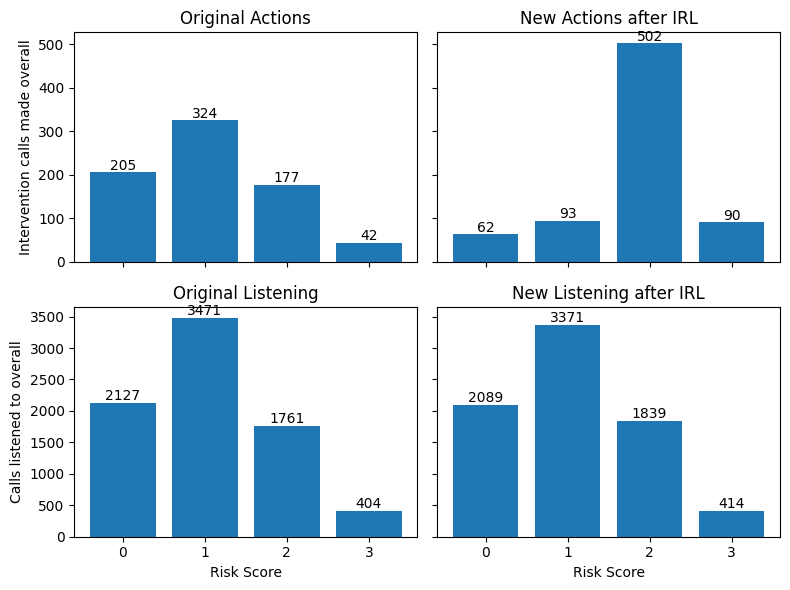

In [422]:
# Count original and edited interventions over risk scores

edited_actions_summary_risk = np.zeros(n_risk_groups)
edited_listening_summary_risk = np.zeros(n_risk_groups)
actions_summary_risk = np.zeros(n_risk_groups)
listening_summary_risk = np.zeros(n_risk_groups)

guess_actions_summary_risk = np.zeros(n_risk_groups)
guess_listening_summary_risk = np.zeros(n_risk_groups)
for traj in range(num_traj):
    for i in range(n): # for each beneficary
        for j in range(10): # for each timestep
            # joint traj is of form (s,a,s',r)
            edited_actions_summary_risk[risk_scores[i]] += edited_action_traj_multiple[traj,0,j,i]
            edited_listening_summary_risk[risk_scores[i]] += edited_state_traj_multiple[traj,0,j,i]
            actions_summary_risk[risk_scores[i]] += action_traj_multiple[traj,0,j,i]
            listening_summary_risk[risk_scores[i]] += state_traj_multiple[traj,0,j,i]
            guess_actions_summary_risk[risk_scores[i]] += guess_action_traj_multiple[traj,0,j,i]
            guess_listening_summary_risk[risk_scores[i]] += guess_state_traj_multiple[traj,0,j,i]
x = np.arange(n_risk_groups)
edited_actions_summary_risk = edited_actions_summary_risk/num_traj
edited_listening_summary_risk = edited_listening_summary_risk/num_traj
actions_summary_risk = actions_summary_risk/num_traj
listening_summary_risk = listening_summary_risk/num_traj

guess_actions_summary_risk = guess_actions_summary_risk/num_traj
guess_listening_summary_risk = guess_listening_summary_risk/num_traj

fig, axs = plt.subplots(2, 2, figsize=(8, 6),sharex=True, sharey='row')

# Plot the bar charts in each subplot
axs[0, 0].bar(x, actions_summary_risk)

axs[0, 0].set_title('Original Actions')
axs[0, 0].set_ylabel('Intervention calls made overall')
for risk, val in zip(x, actions_summary_risk):
    axs[0, 0].text(risk, int(val), str(int(val)), ha='center', va='bottom')


axs[0, 1].bar(x, edited_actions_summary_risk)
axs[0, 1].set_title('New Actions after IRL')
for risk, val in zip(x, edited_actions_summary_risk):
    axs[0, 1].text(risk, int(val), str(int(val)), ha='center', va='bottom')

axs[1, 0].bar(x, listening_summary_risk)
axs[1, 0].set_title('Original Listening')
axs[1, 0].set_ylabel('Calls listened to overall')
axs[1, 0].set_xlabel('Risk Score')
for risk, val in zip(x, listening_summary_risk):
    axs[1, 0].text(risk, int(val), str(int(val)), ha='center', va='bottom')
axs[1, 1].set_xlabel('Risk Score')


axs[1, 1].bar(x, edited_listening_summary_risk)
axs[1, 1].set_title('New Listening after IRL')
for risk, val in zip(x, edited_listening_summary_risk):
    axs[1, 1].text(risk, int(val), str(int(val)), ha='center', va='bottom')
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

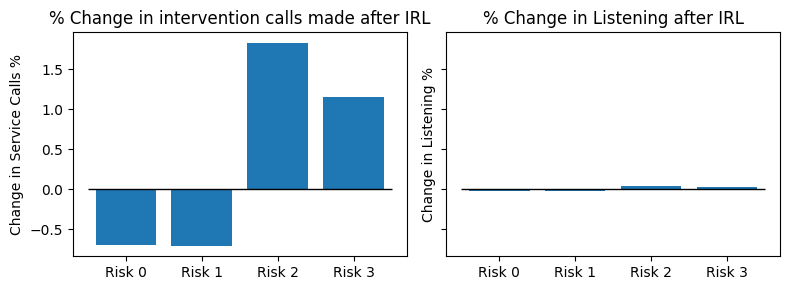

In [426]:
# Plot percentages
edited_actions_summary_risk_percent = (edited_actions_summary_risk - actions_summary_risk)/np.array(actions_summary_risk,dtype=float)
edited_listening_summary_risk_percent = (edited_listening_summary_risk - listening_summary_risk)/np.array(listening_summary_risk,dtype=float)

fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey='row')
axs[0].set_title('% Change in intervention calls made after IRL')
axs[0].set_ylabel('Change in Service Calls %')
axs[0].bar(['Risk 0', 'Risk 1', 'Risk 2','Risk 3'], edited_actions_summary_risk_percent)


axs[1].bar(['Risk 0', 'Risk 1', 'Risk 2','Risk 3'], edited_listening_summary_risk_percent)
axs[1].set_title('% Change in Listening after IRL')
axs[1].set_ylabel('Change in Listening %')


axs[1].hlines(0, -0.5, len(x) - 0.5, colors='black', linewidth=1)
axs[0].hlines(0, -0.5, len(x) - 0.5, colors='black', linewidth=1)

plt.tight_layout()
plt.show()

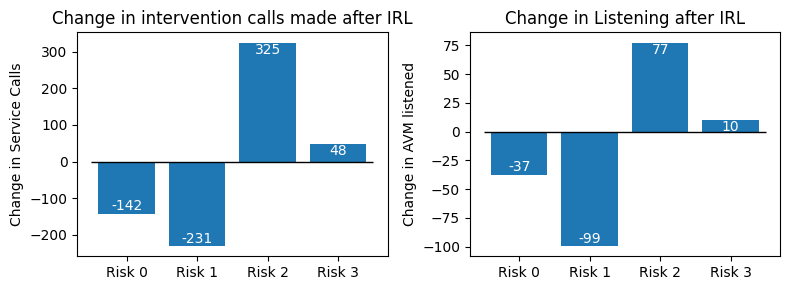

In [437]:
# Plot absolute change
edited_actions_summary_risk_abs = (edited_actions_summary_risk - actions_summary_risk)
edited_listening_summary_risk_abs = (edited_listening_summary_risk - listening_summary_risk)

fig, axs = plt.subplots(1, 2, figsize=(8, 3))
axs[0].set_title('Change in intervention calls made after IRL')
axs[0].set_ylabel('Change in Service Calls')
axs[0].bar(['Risk 0', 'Risk 1', 'Risk 2','Risk 3'], edited_actions_summary_risk_abs)
for risk, val in zip(x, edited_actions_summary_risk_abs):
    if val <0:
        va='bottom'
    else:
        va='top'
    axs[0].text(risk, int(val), str(int(val)), ha='center', va=va,color='white')
axs[1].bar(['Risk 0', 'Risk 1', 'Risk 2','Risk 3'], edited_listening_summary_risk_abs)
axs[1].set_title('Change in Listening after IRL')
axs[1].set_ylabel('Change in AVM listened')
for risk, val in zip(x, edited_listening_summary_risk_abs):
    if val <0:
        va='bottom'
    else:
        va='top'
    axs[1].text(risk, int(val), str(int(val)), ha='center', va=va,color='white')
axs[1].hlines(0, -0.5, len(x) - 0.5, colors='black', linewidth=1)
axs[0].hlines(0, -0.5, len(x) - 0.5, colors='black', linewidth=1)

y0_min, y0_max = axs[0].get_ylim()
y1_min, y1_max = axs[1].get_ylim()

plt.tight_layout()
plt.show()

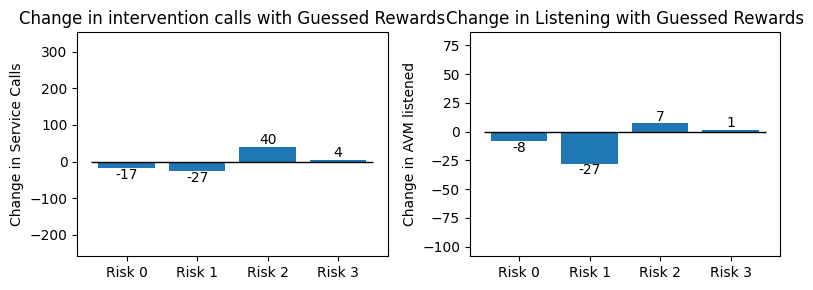

In [438]:
# Plot absolute change with guessed rewards
guess_actions_summary_risk_abs = (guess_actions_summary_risk - actions_summary_risk)
guess_listening_summary_risk_abs = (guess_listening_summary_risk - listening_summary_risk)

fig, axs = plt.subplots(1, 2, figsize=(8, 3))
axs[0].set_title('Change in intervention calls with Guessed Rewards')
axs[0].set_ylabel('Change in Service Calls')
axs[0].bar(['Risk 0', 'Risk 1', 'Risk 2','Risk 3'], guess_actions_summary_risk_abs)
for risk, val in zip(x, guess_actions_summary_risk_abs):
    if val <0:
        va='top'
    else:
        va='bottom'
    axs[0].text(risk, int(val), str(int(val)), ha='center', va=va)
axs[1].bar(['Risk 0', 'Risk 1', 'Risk 2','Risk 3'], guess_listening_summary_risk_abs)
axs[1].set_title('Change in Listening with Guessed Rewards')
axs[1].set_ylabel('Change in AVM listened')
for risk, val in zip(x, guess_listening_summary_risk_abs):
    if val <0:
        va='top'
    else:
        va='bottom'
    axs[1].text(risk, int(val), str(int(val)), ha='center', va=va)
axs[1].hlines(0, -0.5, len(x) - 0.5, colors='black', linewidth=1)
axs[0].hlines(0, -0.5, len(x) - 0.5, colors='black', linewidth=1)

axs[0].set_ylim(y0_min, y0_max)
axs[1].set_ylim(y1_min, y1_max)


plt.tight_layout()
plt.show()

[605, 944, 605]
[-37.6   -99.425  87.525]


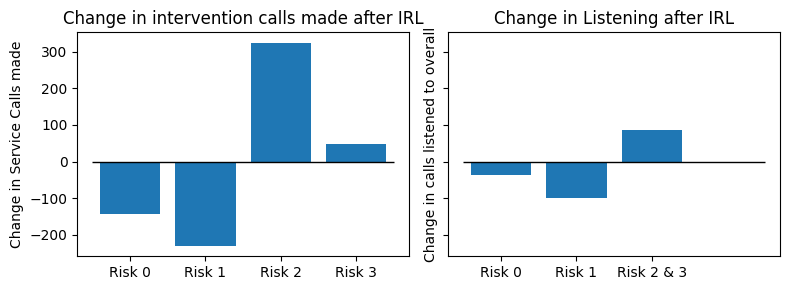

In [425]:
# Plot absolute change
edited_actions_summary_risk_percent = edited_actions_summary_risk - actions_summary_risk
edited_listening_summary_risk_percent = edited_listening_summary_risk - listening_summary_risk

fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey='row')
axs[0].set_title('Change in intervention calls made after IRL')
axs[0].set_ylabel('Change in Service Calls made')


axs[0].bar(['Risk 0', 'Risk 1', 'Risk 2','Risk 3'], edited_actions_summary_risk_percent)
combined_difference = edited_listening_summary_risk_percent[2]+edited_listening_summary_risk_percent[3]
combined_counts = value_counts[2]+value_counts[3]
edited_value_counts = list(value_counts[:2]) + [combined_counts]
print(edited_value_counts)
print(np.array(list(edited_listening_summary_risk_percent[:2])+[combined_difference]))
axs[1].bar(['Risk 0', 'Risk 1', 'Risk 2 & 3'], np.array(list(edited_listening_summary_risk_percent[:2])+[combined_difference]))
axs[1].set_title('Change in Listening after IRL')
axs[1].set_ylabel('Change in calls listened to overall')

axs[1].hlines(0, -0.5, len(x) - 0.5, colors='black', linewidth=1)
axs[0].hlines(0, -0.5, len(x) - 0.5, colors='black', linewidth=1)
axs[1].yaxis.set_label_position("left")
axs[1].yaxis.tick_left()

plt.tight_layout()
plt.show()

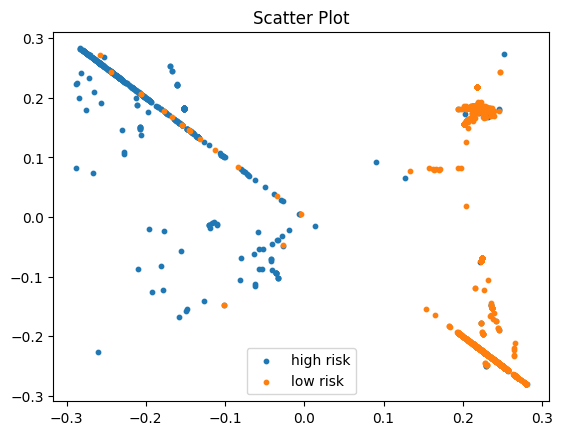

In [319]:
# Plot new rewards

filtered_df_low = df_original[np.logical_or(risk_scores==0,risk_scores == 1)]
filtered_df_high = df_original[np.logical_or(risk_scores==2,risk_scores == 3)]

# plt.scatter(df_original[0],df_original[1],c=clusters, cmap='rainbow', s=5)
plt.scatter((filtered_df_high[0]), (filtered_df_high[1]),label="high risk",s=10)
plt.scatter((filtered_df_low[0]), (filtered_df_low[1]),label="low risk",s=10)

plt.title('Scatter Plot')
plt.legend()  # Show the legend

# Show the plot
plt.show()


605


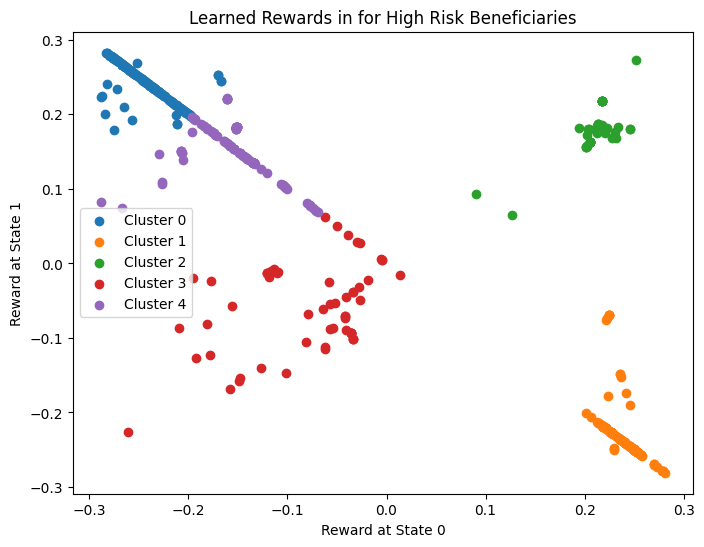

In [389]:
df_with_indices = df_original.reset_index()
filtered_df_high = df_original[np.logical_or(risk_scores==2,risk_scores == 3)]
num_clusters = 5 # Number of clusters
points = filtered_df_high[[0,1]]
print(len(points))
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(points)
cluster_labels = kmeans.labels_
# Step 3: Plot the points with different colors for each cluster
plt.figure(figsize=(8, 6))
for cluster_label in range(num_clusters):
    cluster_points = points[cluster_labels == cluster_label]
    plt.scatter(cluster_points[0], cluster_points[1], label=f'Cluster {cluster_label}')

plt.xlabel('Reward at State 0')
plt.ylabel('Reward at State 1')
plt.title('Learned Rewards in for High Risk Beneficiaries')
plt.legend()
plt.show()

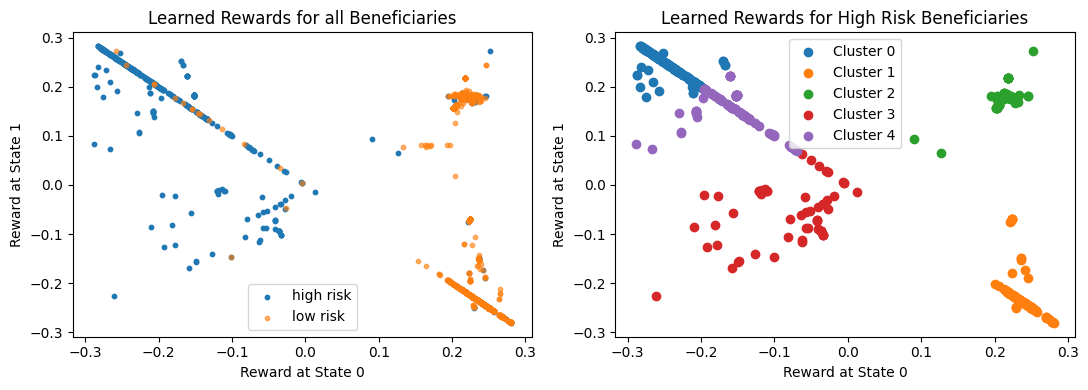

In [390]:
fig, axs = plt.subplots(1, 2, figsize=(11, 4))
cluster_colors =  ['#03045e', '#0077b6',  '#00b4d8', '#90e0ef','#caf0f8']
axs[0].set_title('Learned Rewards for all Beneficiaries')
axs[0].set_ylabel('Reward at State 1')
axs[0].set_xlabel('Reward at State 0')
axs[1].set_xlabel('Reward at State 0')
axs[0].scatter((filtered_df_high[0]), (filtered_df_high[1]),label="high risk",s=10)
axs[0].scatter((filtered_df_low[0]), (filtered_df_low[1]),label="low risk",s=10,alpha=0.6)

i=0
for cluster_label in range(num_clusters):
    cluster_points = points[cluster_labels == cluster_label]
    axs[1].scatter(cluster_points[0], cluster_points[1], label=f'Cluster {cluster_label}')
    i+=1
# axs[1].bar(np.arange(num_clusters), new_result_array/cluster_value_counts,color=colors[:num_clusters])
axs[1].set_title('Learned Rewards for High Risk Beneficiaries')
axs[1].set_ylabel('Reward at State 1')

axs[1].legend()
axs[0].legend()
plt.tight_layout()
plt.show()

(253, 2)
(58, 2)
(195, 2)


<Figure size 800x600 with 0 Axes>

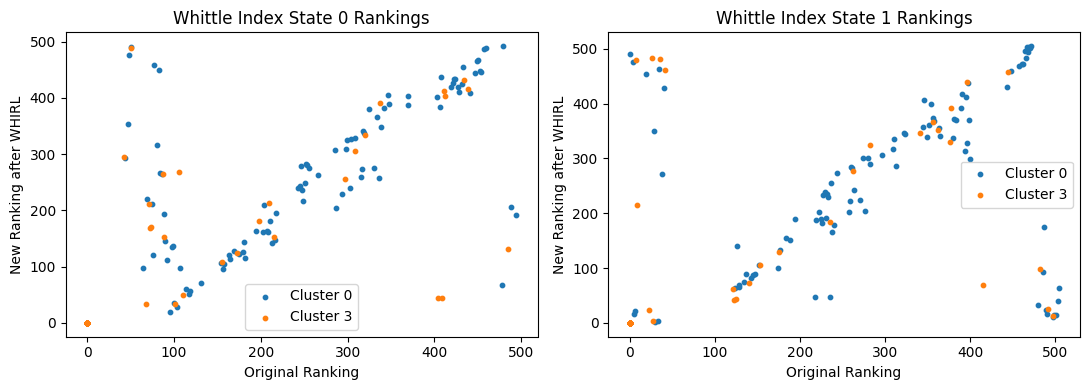

In [393]:
df_with_indices = df_original.reset_index()
cluster_unique_values, cluster_value_counts = np.unique(cluster_labels, return_counts=True)

filtered_df_high = df_original[np.logical_or(risk_scores==2,risk_scores == 3)]
filtered_w = w[np.logical_or(risk_scores==2,risk_scores == 3)][np.logical_or(cluster_labels==0,cluster_labels == 3)]
ranked_w = np.argsort(np.argsort(filtered_w.flatten())).reshape(filtered_w.shape)
filtered_w_opt =w_opt[np.logical_or(risk_scores==2,risk_scores == 3)][np.logical_or(cluster_labels==0,cluster_labels == 3)]
ranked_w_opt = np.argsort(np.argsort(filtered_w_opt.flatten())).reshape(filtered_w_opt.shape)

# Step 3: Plot the points with different colors for each cluster
points_cluster_0_engaged = np.zeros((cluster_value_counts[0],2))
points_cluster_3_engaged = np.zeros((cluster_value_counts[3],2))

points_cluster_0_disengaged = np.zeros((cluster_value_counts[0],2))
points_cluster_3_disengaged = np.zeros((cluster_value_counts[3],2))
index_0 = 0
index_3 = 0
plt.figure(figsize=(8, 6))
for i in range(len(filtered_w)):
    if cluster_labels[i] == 0:
        points_cluster_0_engaged[index_0] = [ranked_w_opt[i,1], ranked_w[i,1]] 
        points_cluster_0_disengaged[index_0] = [ranked_w_opt[i,0], ranked_w[i,0]] 
        index_0 +=1
    if cluster_labels[i] == 3:
        points_cluster_3_engaged[index_3] = [ranked_w_opt[i,1], ranked_w[i,1]] 
        points_cluster_3_disengaged[index_3] = [ranked_w_opt[i,0], ranked_w[i,0]] 
        index_3 +=1

fig, axs = plt.subplots(1, 2, figsize=(11, 4))
axs[0].set_title('Whittle Index State 0 Rankings')
axs[1].set_title('Whittle Index State 1 Rankings')
axs[0].set_xlabel('Original Ranking')
axs[0].set_ylabel('New Ranking after WHIRL')
axs[1].set_xlabel('Original Ranking')
axs[1].set_ylabel('New Ranking after WHIRL')
axs[0].scatter(points_cluster_0_disengaged[:,0],points_cluster_0_disengaged[:,1],label="Cluster 0",s=10)
axs[0].scatter(points_cluster_3_disengaged[:,0],points_cluster_3_disengaged[:,1],label="Cluster 3",s=10)

axs[1].scatter(points_cluster_0_engaged[:,0],points_cluster_0_engaged[:,1],label="Cluster 0",s=10)
axs[1].scatter(points_cluster_3_engaged[:,0],points_cluster_3_engaged[:,1],label="Cluster 3",s=10)

print(ranked_w.shape)
print(points_cluster_3_engaged.shape)
print(points_cluster_0_engaged.shape)
axs[1].legend()
axs[0].legend()
plt.tight_layout()
plt.show()

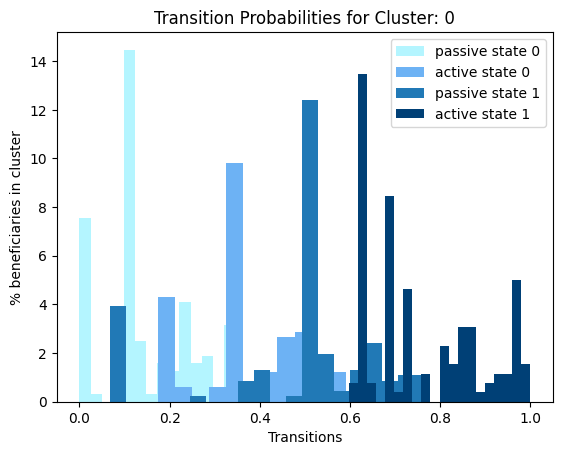

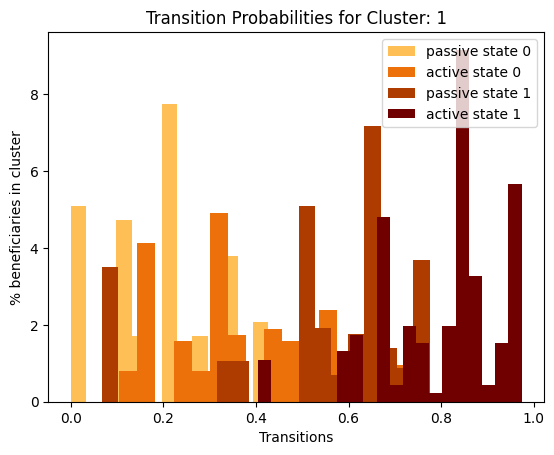

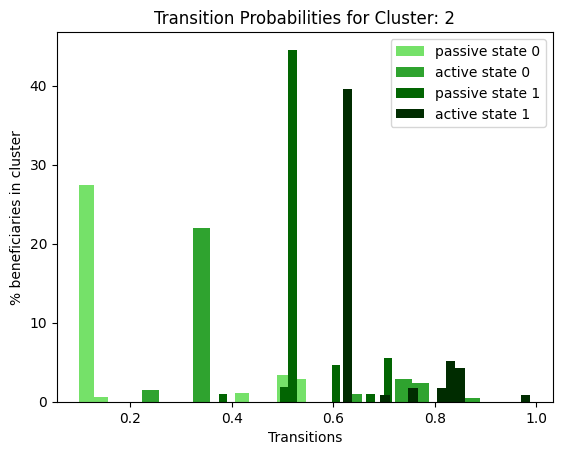

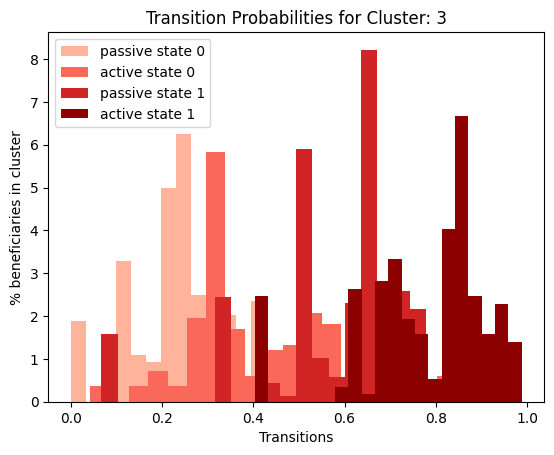

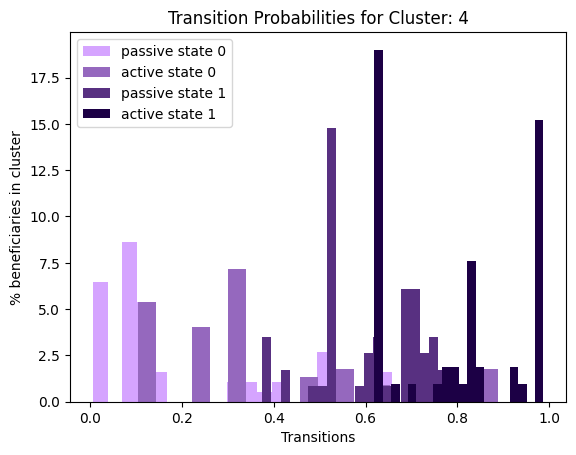

In [292]:
colors = [['#004076', '#2179b6', '#6db2f4', '#b4f5ff'],['#700000', '#ae3c00', '#ed710b', '#ffbf57'] ,['#002c00', '#026502', '#2fa32f', '#75e169'], ['#8c0000', '#d02425', '#fa6859', '#ffb39b'],['#1c0045', '#583081', '#9568be', '#d5a4ff'], ['#4f2018', '#8a554a', '#ca8e81', '#ffd1c3'], ['#60004a', '#a03883', '#dc70bc', '#ffb7ff'] ]
for i in range(num_clusters):
    clustered_transitions = filtered_df_high['Unnamed: 0'][cluster_labels==i]
    plt.hist(transition_probabilities[np.array(clustered_transitions),0,0,1], bins=20, label="passive state 0",density=True,color=colors[i][3])
    plt.hist(transition_probabilities[np.array(clustered_transitions),0,1,1], bins=20, label="active state 0",density=True,color=colors[i][2])
    plt.hist(transition_probabilities[np.array(clustered_transitions),1,0,1], bins=20, label="passive state 1",density=True,color=colors[i][1])
    plt.hist(transition_probabilities[np.array(clustered_transitions),1,1,1], bins=20, label="active state 1",density=True, color=colors[i][0])
    plt.legend()
    plt.xlabel('Transitions')
    plt.ylabel('% beneficiaries in cluster')
    plt.title("Transition Probabilities for Cluster: "+str(i))
    plt.show()

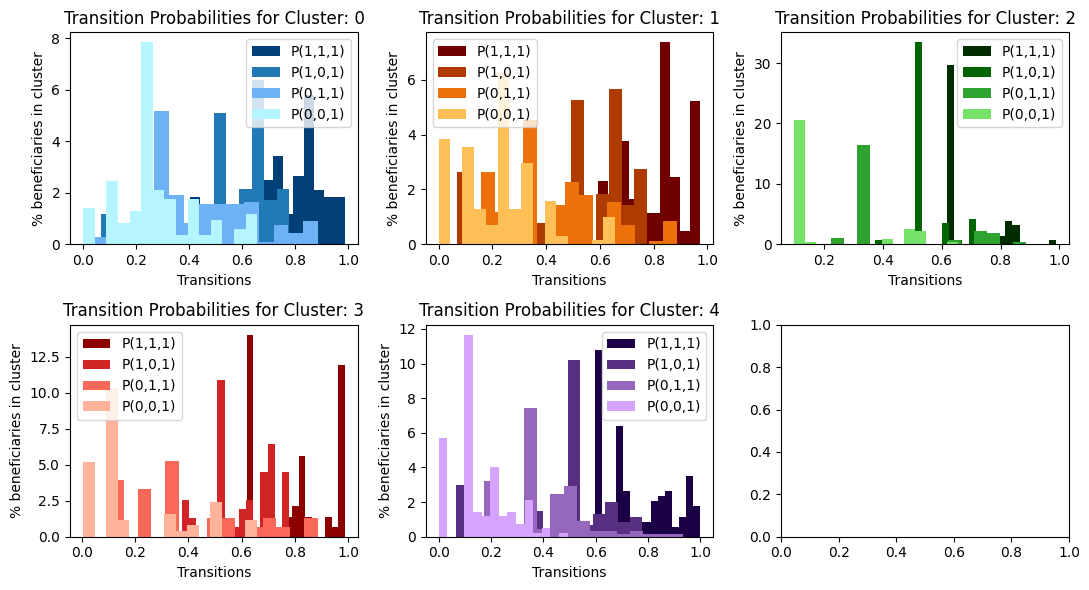

In [345]:
fig, axs = plt.subplots(2, 3, figsize=(11, 6))
colors = [['#004076', '#2179b6', '#6db2f4', '#b4f5ff'],['#700000', '#ae3c00', '#ed710b', '#ffbf57'] ,['#002c00', '#026502', '#2fa32f', '#75e169'], ['#8c0000', '#d02425', '#fa6859', '#ffb39b'],['#1c0045', '#583081', '#9568be', '#d5a4ff'], ['#4f2018', '#8a554a', '#ca8e81', '#ffd1c3'], ['#60004a', '#a03883', '#dc70bc', '#ffb7ff'] ]
for i in range(num_clusters):
    clustered_transitions = filtered_df_high['Unnamed: 0'][cluster_labels==i]
    axs[int(i/3),i%3].hist(transition_probabilities[np.array(clustered_transitions),1,1,1], bins=15, label="P(1,1,1)",density=True, color=colors[i][0])
    axs[int(i/3),i%3].hist(transition_probabilities[np.array(clustered_transitions),1,0,1], bins=15, label="P(1,0,1)",density=True,color=colors[i][1])
    axs[int(i/3),i%3].hist(transition_probabilities[np.array(clustered_transitions),0,1,1], bins=15, label="P(0,1,1)",density=True,color=colors[i][2])

    axs[int(i/3),i%3].hist(transition_probabilities[np.array(clustered_transitions),0,0,1], bins=15, label="P(0,0,1)",density=True,color=colors[i][3])

    axs[int(i/3),i%3].legend()
    axs[int(i/3),i%3].set_xlabel('Transitions')
    axs[int(i/3),i%3].set_ylabel('% beneficiaries in cluster')
    axs[int(i/3),i%3].set_title("Transition Probabilities for Cluster: "+str(i))
plt.tight_layout()
plt.show()

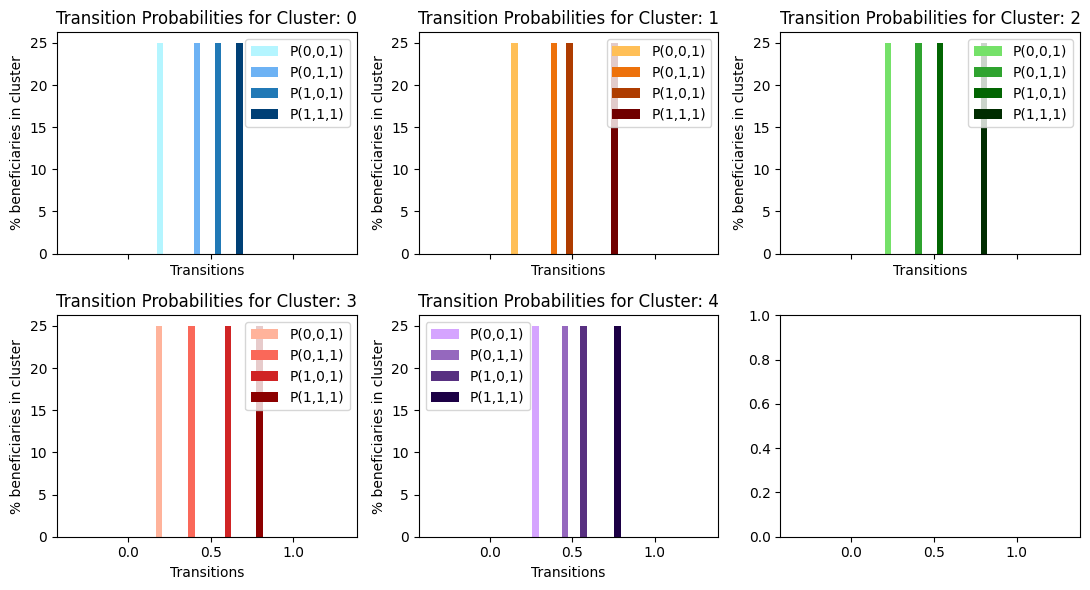

In [280]:
fig, axs = plt.subplots(2, 3, figsize=(11, 6),sharex=True)
colors = [['#004076', '#2179b6', '#6db2f4', '#b4f5ff'],['#700000', '#ae3c00', '#ed710b', '#ffbf57'] ,['#002c00', '#026502', '#2fa32f', '#75e169'], ['#8c0000', '#d02425', '#fa6859', '#ffb39b'],['#1c0045', '#583081', '#9568be', '#d5a4ff'], ['#4f2018', '#8a554a', '#ca8e81', '#ffd1c3'], ['#60004a', '#a03883', '#dc70bc', '#ffb7ff'] ]
for i in range(num_clusters):
    clustered_transitions = filtered_df_high['Unnamed: 0'][cluster_labels==i]
    axs[int(i/3),i%3].hist(np.mean(transition_probabilities[np.array(clustered_transitions),0,0,1]), bins=25, label="P(0,0,1)",density=True,color=colors[i][3])
    axs[int(i/3),i%3].hist(np.mean(transition_probabilities[np.array(clustered_transitions),0,1,1]), bins=25, label="P(0,1,1)",density=True,color=colors[i][2])
    axs[int(i/3),i%3].hist(np.mean(transition_probabilities[np.array(clustered_transitions),1,0,1]), bins=25, label="P(1,0,1)",density=True,color=colors[i][1])
    axs[int(i/3),i%3].hist(np.mean(transition_probabilities[np.array(clustered_transitions),1,1,1]), bins=25, label="P(1,1,1)",density=True, color=colors[i][0])
    axs[int(i/3),i%3].legend()
    axs[int(i/3),i%3].set_xlabel('Transitions')
    axs[int(i/3),i%3].set_ylabel('% beneficiaries in cluster')
    axs[int(i/3),i%3].set_title("Transition Probabilities for Cluster: "+str(i))
plt.tight_layout()
plt.show()

<BarContainer object of 6 artists>

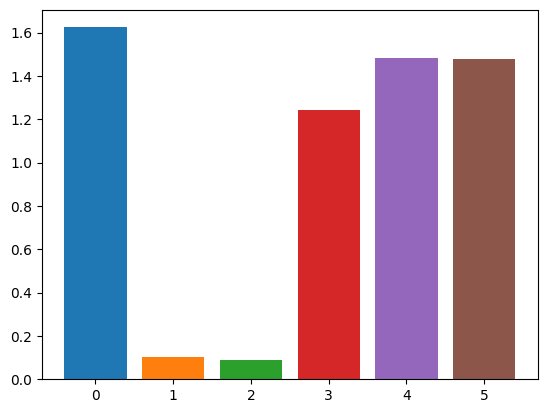

In [338]:
# average calls made per person in cluster
cluster_unique_values, cluster_value_counts = np.unique(cluster_labels, return_counts=True)
edited_action_sum = np.sum(edited_action_traj_multiple[:,:,1:11,:], axis = (0,1,2))/num_traj
edited_action_high_risk = edited_action_sum[np.array(filtered_df_high['Unnamed: 0'])]
new_result_array = np.zeros(num_clusters)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']
np.add.at(new_result_array, cluster_labels, edited_action_high_risk)
plt.bar(np.arange(num_clusters), new_result_array/cluster_value_counts,color=colors[:num_clusters])

<BarContainer object of 6 artists>

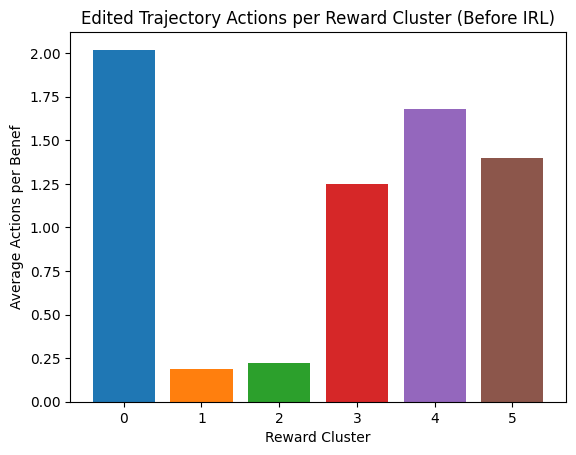

In [339]:
# average calls made per person in cluster
cluster_unique_values, cluster_value_counts = np.unique(cluster_labels, return_counts=True)
edited_action_sum = np.sum(edited_action_traj_risk[:,:,1:10,:], axis = (0,1,2))
original_action_sum = np.sum(action_traj[:,:,1:11,:], axis = (0,1,2))

edited_action_high_risk = edited_action_sum[np.array(filtered_df_high['Unnamed: 0'])]
original_action_high_risk = original_action_sum[np.array(filtered_df_high['Unnamed: 0'])]

result_array = np.zeros(num_clusters)
original_result_array = np.zeros(num_clusters)

# print(np.shape(cluster_labels))
# print(np.shape(original_action_high_risk))

np.add.at(result_array, cluster_labels, edited_action_high_risk)
np.add.at(original_result_array, cluster_labels, original_action_high_risk)
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']
plt.title('Edited Trajectory Actions per Reward Cluster (Before IRL)')
plt.ylabel('Average Actions per Benef')
plt.xlabel('Reward Cluster')
plt.bar(np.arange(num_clusters), result_array/cluster_value_counts,color=colors[:num_clusters])
# plt.bar(np.arange(num_clusters), original_result_array)


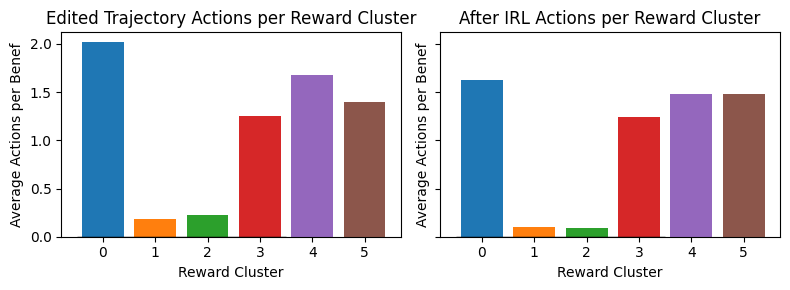

In [340]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey='row')
axs[0].set_title('Edited Trajectory Actions per Reward Cluster')
axs[0].set_ylabel('Average Actions per Benef')
axs[0].set_xlabel('Reward Cluster')
axs[1].set_xlabel('Reward Cluster')
axs[0].bar(np.arange(num_clusters), result_array/cluster_value_counts,color=colors[:num_clusters])
# for risk, val in zip(x, edited_actions_summary_risk_abs):
#     if val <0:
#         va='top'
#     else:
#         va='bottom'
#     axs[0].text(risk, int(val), str(int(val)), ha='center', va=va)
axs[1].bar(np.arange(num_clusters), new_result_array/cluster_value_counts,color=colors[:num_clusters])
axs[1].set_title('After IRL Actions per Reward Cluster')
axs[1].set_ylabel('Average Actions per Benef')
# for risk, val in zip(x, edited_listening_summary_risk_abs):
#     if val <0:
#         va='top'
#     else:
#         va='bottom'
#     axs[1].text(risk, int(val), str(int(val)), ha='center', va=va)
axs[1].hlines(0, -0.5, len(x) - 0.5, colors='black', linewidth=1)
axs[0].hlines(0, -0.5, len(x) - 0.5, colors='black', linewidth=1)

plt.tight_layout()
plt.show()

<BarContainer object of 5 artists>

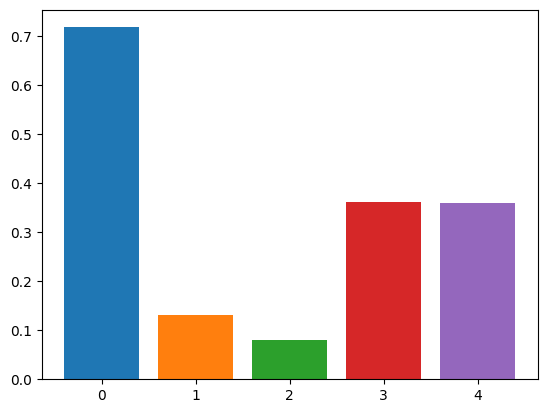

In [318]:
plt.bar(np.arange(num_clusters), original_result_array/cluster_value_counts, color=colors[:num_clusters])

<BarContainer object of 5 artists>

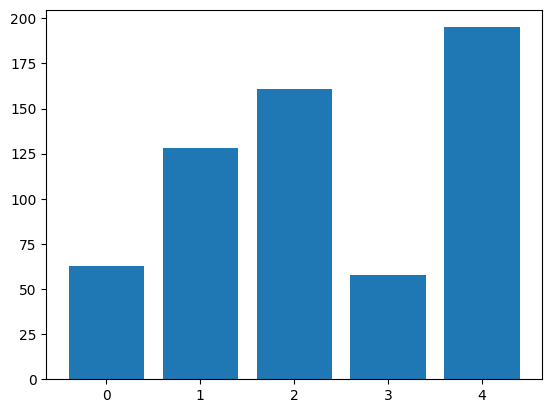

In [283]:
plt.bar(np.arange(num_clusters), cluster_value_counts)

In [ ]:
Cluster 1    cluster 2
5 actions    2 actions
10 benef     6 benef

0.2          0.2
1            0.8

(cluster_n_ben-n_original_action)*probability